# Import Libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split 

# Load the dataset

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# 1.Univariate Analysis


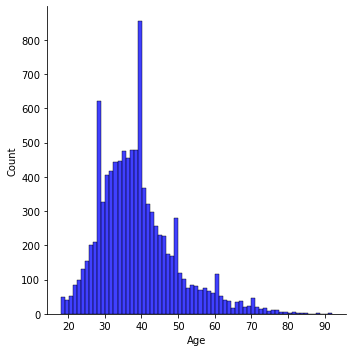

In [8]:
sns.displot(df['Age'],color='blue')

<AxesSubplot:xlabel='Count', ylabel='Age'>

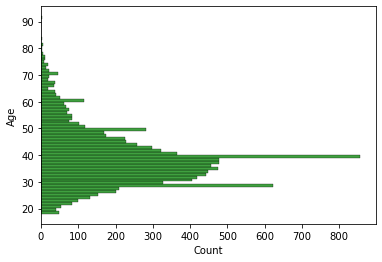

In [10]:
sns.histplot(y="Age",data=df,color='green')

<AxesSubplot:xlabel='Age', ylabel='Count'>

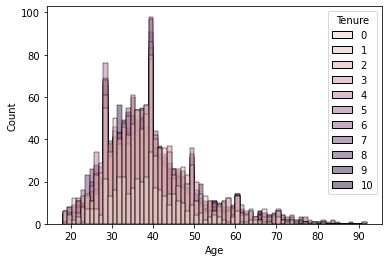

In [12]:
sns.histplot(x="Age",data=df,hue=df['Tenure'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

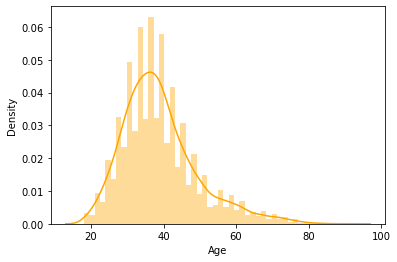

In [16]:
sns.distplot(df["Age"],color='orange')

<AxesSubplot:xlabel='Age', ylabel='Density'>

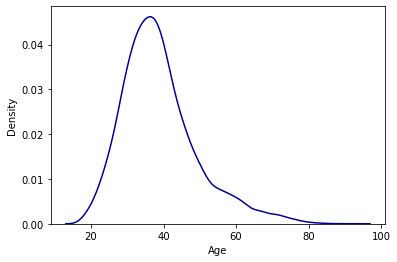

In [20]:
sns.distplot(df["Age"],hist=False,color='darkblue') 

<AxesSubplot:xlabel='Age'>

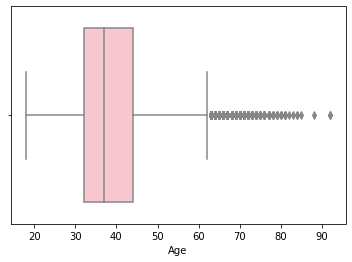

In [21]:
sns.boxplot(df["Age"],color='pink') 

<AxesSubplot:xlabel='Age', ylabel='count'>

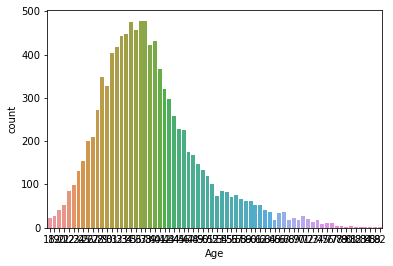

In [22]:
sns.countplot(df['Age']) 

# 2. Bivariate Analysis

<AxesSubplot:xlabel='NumOfProducts', ylabel='Age'>

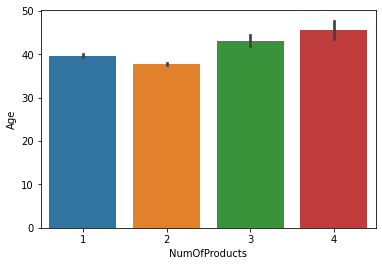

In [25]:
sns.barplot(df["NumOfProducts"],df["Age"])

<AxesSubplot:xlabel='Age', ylabel='NumOfProducts'>

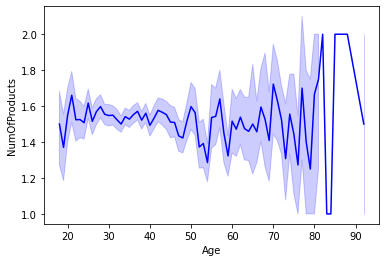

In [26]:
sns.lineplot(df["Age"],df["NumOfProducts"], color='blue')

<AxesSubplot:xlabel='Age', ylabel='RowNumber'>

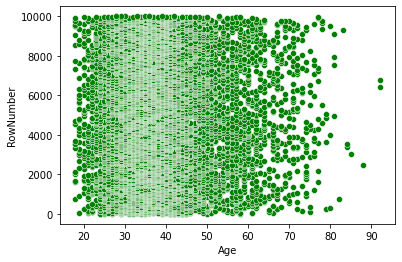

In [27]:
sns.scatterplot(x=df.Age,y=df.RowNumber,color='green')

<AxesSubplot:xlabel='Age', ylabel='Tenure'>

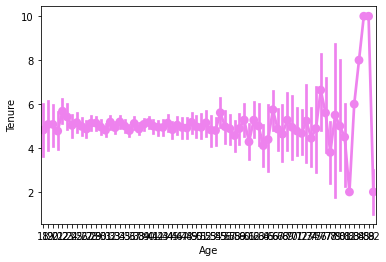

In [28]:
sns.pointplot(x='Age',y='Tenure',data=df,color='violet') 

<AxesSubplot:xlabel='Age', ylabel='Tenure'>

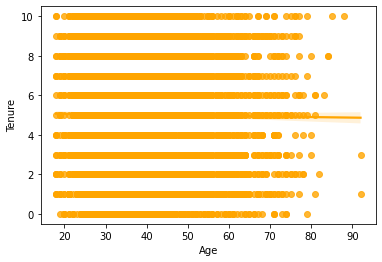

In [29]:
sns.regplot(df['Age'],df['Tenure'],color='orange')

# 3. Multi - variate Analysis

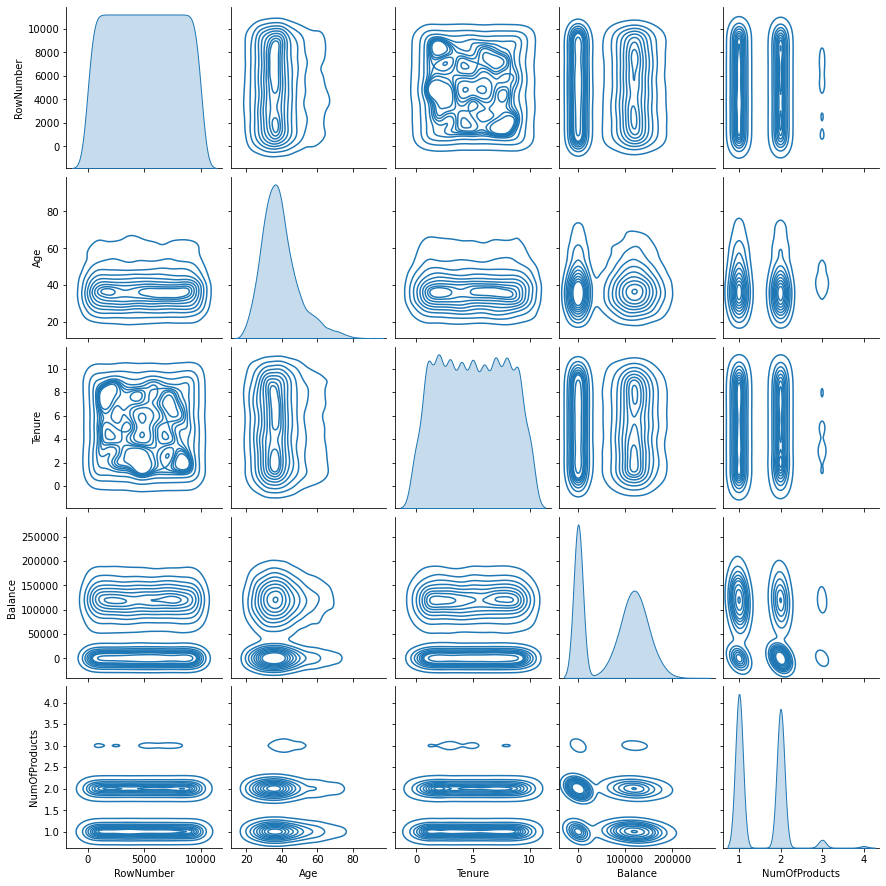

In [30]:
sns.pairplot(data=df[["RowNumber","Age","Tenure","Balance","NumOfProducts"]],kind="kde")

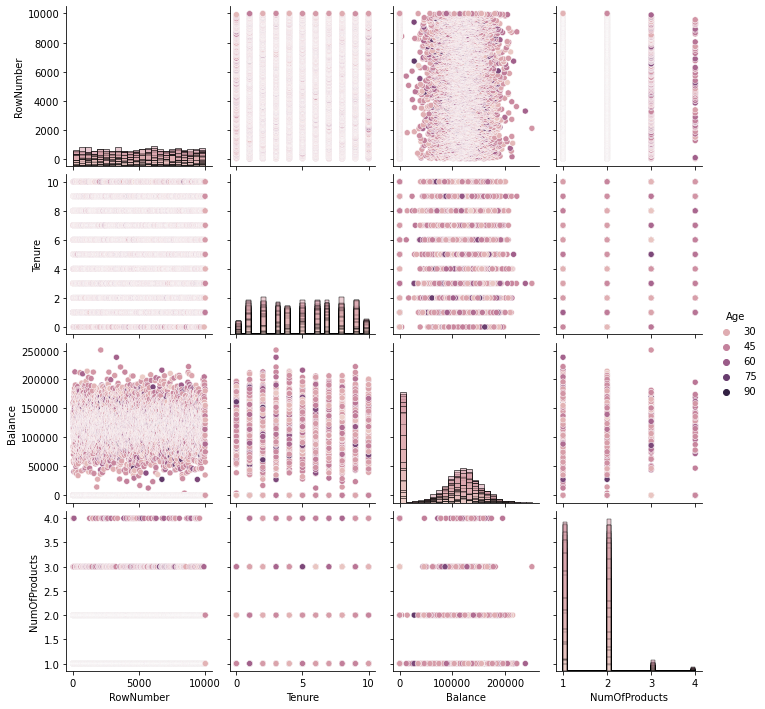

In [31]:
sns.pairplot(data=df[["RowNumber","Age","Tenure","Balance","NumOfProducts"]], hue="Age", diag_kind="hist")

# 4.Perform descriptive statistics on the dataset

In [32]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# 5.Handle the missing values

In [33]:
data=pd.DataFrame({"a":[1,2,np.nan],"b":[1,np.nan,np.nan],"c":[1,2,4]})

In [36]:
data

,a,b,c
0,1.0,1.0,1
1,2.0,NaN,2
2,NaN,NaN,4


In [37]:
data.isnull().any()

a     True
b     True
c    False
dtype: bool

In [38]:
data.isnull().sum()

a    1
b    2
c    0
dtype: int64

In [39]:
data.fillna(value = "S")

,a,b,c
0,1.0,1.0,1
1,2.0,S,2
2,S,S,4


In [40]:
data["a"].mean()

1.5

# 6.Find the outliers and replace the outliers

In [43]:
outliers=df.quantile(q=(0.25,0.75))

In [44]:
outliers

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.25,2500.75,15628528.25,584.0,32.0,3.0,0.00,1.0,0.0,0.0,51002.1100,0.0
0.75,7500.25,15753233.75,718.0,44.0,7.0,127644.24,2.0,1.0,1.0,149388.2475,0.0


In [46]:
aa=outliers.loc[0.75]-outliers.loc[0.25]

In [49]:
aa

RowNumber            4999.5000
CustomerId         124705.5000
CreditScore           134.0000
Age                    12.0000
Tenure                  4.0000
Balance            127644.2400
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     98386.1375
Exited                  0.0000
dtype: float64

In [51]:
low=outliers.loc[0.25]-1.5*aa

In [52]:
low

RowNumber         -4.998500e+03
CustomerId         1.544147e+07
CreditScore        3.830000e+02
Age                1.400000e+01
Tenure            -3.000000e+00
Balance           -1.914664e+05
NumOfProducts     -5.000000e-01
HasCrCard         -1.500000e+00
IsActiveMember    -1.500000e+00
EstimatedSalary   -9.657710e+04
Exited             0.000000e+00
dtype: float64

In [54]:
high=outliers.loc[0.75]+1.5*aa

In [58]:
high

RowNumber          1.499950e+04
CustomerId         1.594029e+07
CreditScore        9.190000e+02
Age                6.200000e+01
Tenure             1.300000e+01
Balance            3.191106e+05
NumOfProducts      3.500000e+00
HasCrCard          2.500000e+00
IsActiveMember     2.500000e+00
EstimatedSalary    2.969675e+05
Exited             0.000000e+00
dtype: float64

<AxesSubplot:xlabel='Age'>

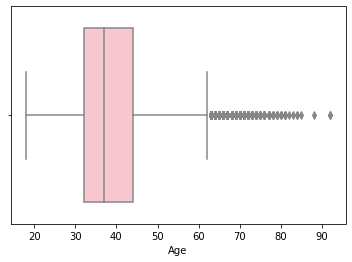

In [59]:
sns.boxplot(df["Age"],color="pink")

In [62]:
df["Age"]=np.where(df['Age']<25,50,df['Age'])

<AxesSubplot:xlabel='Age'>

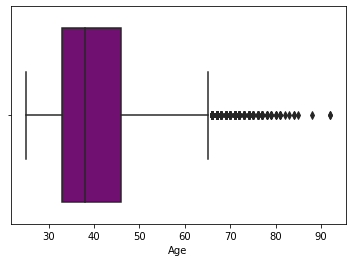

In [64]:
sns.boxplot(df['Age'],color="purple")

# 7. Check for Categorical columns and perform encoding.

In [65]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [66]:
df.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [75]:
df["Gender"].replace({"Female":0,"Male":1},inplace = True)
df["Geography"].replace({"France":1,"Spain":2,"Germany":3},inplace = True)
df["Surname"].replace({"Boni":1,"Onio":3},inplace=True)

In [76]:
df.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,3,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,1,699,1,0,39,1,0.00,2,0,0,93826.63,0



# 8. Split the data into dependent and Independent variables

y = df["Surname"]

In [83]:
x = df.drop(columns=['Surname'],axis=1)

In [85]:
x.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# 9. Scale the Independent variables


In [86]:
names=x.columns

In [87]:
names

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [88]:
x=scale(x)

In [89]:
x

array([[-1.73187761, -0.78321342, -0.32622142, ...,  0.97024255,
         0.02188649,  1.97716468],
       [-1.7315312 , -0.60653412, -0.44003595, ...,  0.97024255,
         0.21653375, -0.50577476],
       [-1.73118479, -0.99588476, -1.53679418, ..., -1.03067011,
         0.2406869 ,  1.97716468],
       ...,
       [ 1.73118479, -1.47928179,  0.60498839, ...,  0.97024255,
        -1.00864308,  1.97716468],
       [ 1.7315312 , -0.11935577,  1.25683526, ..., -1.03067011,
        -0.12523071,  1.97716468],
       [ 1.73187761, -0.87055909,  1.46377078, ..., -1.03067011,
        -1.07636976, -0.50577476]])

In [93]:
x=pd.DataFrame(x,columns=names)

In [94]:
x

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-1.731878,-0.783213,-0.326221,-0.902587,-1.095988,0.179622,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165
1,-1.731531,-0.606534,-0.440036,0.301665,-1.095988,0.080092,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775
2,-1.731185,-0.995885,-1.536794,-0.902587,-1.095988,0.179622,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165
3,-1.730838,0.144767,0.501521,-0.902587,-1.095988,-0.118968,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775
4,-1.730492,0.652659,2.063884,0.301665,-1.095988,0.279152,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.730492,-1.177652,1.246488,-0.902587,0.912419,-0.118968,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,-0.505775
9996,1.730838,-1.682806,-1.391939,-0.902587,0.912419,-0.517088,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,-0.505775
9997,1.731185,-1.479282,0.604988,-0.902587,-1.095988,-0.417558,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1.977165
9998,1.731531,-0.119356,1.256835,1.505917,0.912419,0.179622,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1.977165


# 10. Split the data into Training and Testing

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [97]:
x_train.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7389,0.827747,-0.195066,0.170424,0.301665,-1.095988,-0.616618,-0.004426,-1.225848,0.807737,0.646092,-1.030670,1.108382,-0.505775
9275,1.481077,0.810821,-2.312802,1.505917,0.912419,0.179622,-1.387538,-0.012892,-0.911583,0.646092,0.970243,-0.747592,-0.505775
2995,-0.694379,-1.507642,-1.195351,-0.902587,-1.095988,-1.114268,-1.041760,0.575076,-0.911583,0.646092,-1.030670,1.487464,-0.505775
5316,0.109639,1.243462,0.035916,0.301665,0.912419,-0.019438,-0.004426,0.467955,-0.911583,0.646092,-1.030670,1.278558,-0.505775
356,-1.608556,-1.100775,2.063884,0.301665,-1.095988,1.672571,1.032908,0.806010,0.807737,0.646092,0.970243,0.560069,-0.505775


In [98]:
x_test.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9394,1.522299,-1.045250,-0.553850,1.505917,-1.095988,-0.517088,1.032908,0.875323,-0.911583,0.646092,0.970243,1.613046,-0.505775
898,-1.420801,-0.503813,-1.319512,-0.902587,-1.095988,-0.019438,-1.041760,0.424422,-0.911583,0.646092,-1.030670,0.497532,1.977165
2398,-0.901186,-0.793292,0.573948,0.301665,-1.095988,0.179622,1.032908,0.302927,-0.911583,0.646092,0.970243,-0.423561,-0.505775
5906,0.314021,0.760190,1.422384,-0.902587,0.912419,-0.815678,-0.350204,0.570464,-0.911583,-1.547768,-1.030670,-0.186439,-0.505775
2343,-0.920239,1.042107,0.573948,1.505917,0.912419,-0.218498,-0.004426,1.387129,0.807737,0.646092,0.970243,0.618560,-0.505775


In [100]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((8000, 13), (8000,), (2000, 13), (2000,))

In [101]:
x_train.shape

(8000, 13)